# Linear regression with TensorFlow 

Code Created by Luis Enrique Acevedo Galicia

Date: 2019-27-02

Here, I present a simple and easy way to create a linear regression with TensorFlow. In this case the data based on file Admission_Predict.csv. The targets are represented by the chance of admitance and the inputs are the CGPA (Cumulative Grade Point Average).

# The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing

# The data 

In [2]:
data = pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Verifying that data is completed

In [3]:
data[pd.isnull(data['CGPA'])]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


learning about this data set

In [4]:
CGPA_mean=data ['CGPA'].mean()
CGPA_std=data ['CGPA'].std()
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
# The dependent variable (y) is the price
Targets = data ['Chance of Admit '].as_matrix(columns=None)
Targets=np.reshape(Targets, (400,1))
# The independent variable (x) is the Area
Inputs = data ['CGPA'].as_matrix(columns=None)
Inputs = np.reshape(Inputs, (400,1))
Inputs= preprocessing.scale(Inputs) #(CGPA-mean)/std)
#export the data
np.savez('TF_data', inputs=Inputs, targets=Targets)


/home/bwayne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/bwayne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


# Machine learning model

In [6]:
#size of the variables
size_input = 1
size_output = 1

#define inputs and targets
TF_inputs = tf.placeholder(tf.float32, [None, size_input])
TF_targets = tf.placeholder(tf.float32, [None, size_output])

#initialize variables
m = tf.Variable(tf.random_normal([]))
b = tf.Variable(tf.random_normal([]))

#create the model and the loss
ML_model = tf.add(tf.multiply(TF_inputs,m),b)
#ML_ls = tf.reduce_mean(tf.pow(ML_model - TF_targets,2))
ML_ls =tf.losses.mean_squared_error(labels=TF_targets, predictions=ML_model)
#optimizer
Learning_rate = 0.02
N_epochs = 100
optimizer = tf.train.GradientDescentOptimizer(Learning_rate).minimize(ML_ls)

#Prepare execution

TF_sess = tf.InteractiveSession()
TF_ini = tf.global_variables_initializer()
TF_sess.run(TF_ini)

#load the data
Train_data = np.load('TF_data.npz')


#training

for n  in range(N_epochs):
    _, curr_loss = TF_sess.run([optimizer, ML_ls], 
        feed_dict={TF_inputs: Train_data['inputs'], TF_targets: Train_data['targets']})


#print(curr_loss)
print('m = ', TF_sess.run(m))
print('b = ', TF_sess.run(b))
TF_m=TF_sess.run(m)
TF_b=TF_sess.run(b)

m =  0.1398601
b =  0.71900624


# Plot results

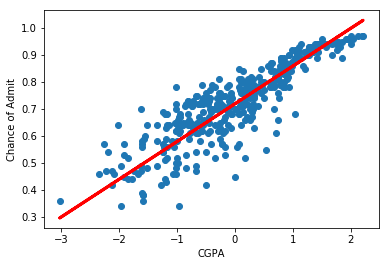

In [7]:
# The same plot
plt.scatter(Inputs,Targets)
y_hat = TF_m*Inputs + TF_b
# Plot the regression line 
fig = plt.plot(Inputs,y_hat, lw=3, c='red', label ='regression line')
plt.ylabel('Chance of Admit')
plt.xlabel('CGPA')
plt.show()

# Test your CGPA

In [8]:
CGPA_test = input("What's your CGPA? ")
Scaled_CGPA=(np.float32(CGPA_test)-CGPA_mean)/CGPA_std
CoA=TF_m*Scaled_CGPA + TF_b
print('Your Chance of admit is ', CoA)

What's your CGPA? 9.36
Your Chance of admit is  0.8975085394634372
